In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import math
# import xlrd3

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
file_names_outdoor = np.array(['outdoor_16-2.csv', 'outdoor_8-1.csv', 'outdoor_8-2.csv', 'outdoor_8-4.csv', 'outdoor_4-2.csv', 'outdoor_4-3.csv'])
file_names_outdoor = np.char.add("outdoor/", file_names_outdoor)

In [3]:
def make_data_outdoor(file_path):
    return pd.read_csv(
        file_path,
        sep=';',                # Ensure correct delimiter
        decimal=',',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=1              # Skip non-data header rows
    )

In [4]:
data_array_outdoor = []
i = 0
for name in file_names_outdoor:
    data_array_outdoor.append(make_data_outdoor(name))
    i += 1
data_array_outdoor[0].head()
N = len(data_array_outdoor)

m = 20.24124111641165 * U + -2.9186518521095843


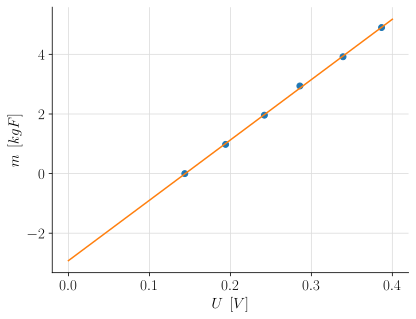

In [5]:
# калибровка тензодатчика
V = np.array([0, 1, 2, 3, 4, 5])
m = V * 980
U = np.array([143.7, 194.1, 242, 285.8, 339.1, 386.7])

fit_calibr = np.polyfit(U / 1000, m / 1000, 1)
x = np.array([0, 0.4])
y = fit_calibr[0] * x + fit_calibr[1]
print("m =", fit_calibr[0], "* U +", fit_calibr[1])

# график калибровки
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(U / 1000, m / 1000, 'o')
plt.plot(x, y)

plt.xlabel(r'$U\:\:[V]$')
plt.ylabel(r'$m\:\:[kgF]$')
plt.grid(color='gainsboro')

p = 2.1327772720647955 * U + -4.255941865177047


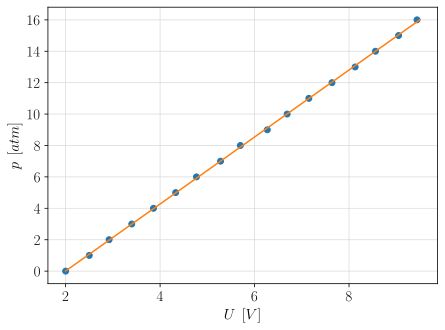

In [6]:
# калибровка давления
p = np.arange(0, 17, 1)
U = np.array([2, 2.50, 2.92, 3.40, 3.86, 4.33, 4.77, 5.28, 5.70, 6.27, 6.69, 7.15, 7.64, 8.13, 8.56, 9.05, 9.44])

fit_p_calibr = np.polyfit(U, p, 1)
x = np.array([2, 9.5])
y = fit_p_calibr[0] * x + fit_p_calibr[1]
print("p =", fit_p_calibr[0], "* U +", fit_p_calibr[1])

plt.plot(U, p, 'o')
plt.plot(x, y)

plt.xlabel(r'$U\:\:[V]$')
plt.ylabel(r'$p\:\:[atm]$')
plt.grid(color='gainsboro')

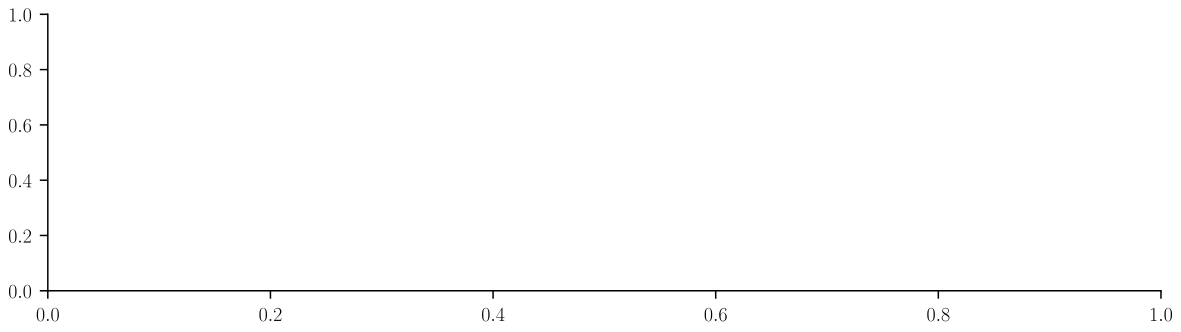

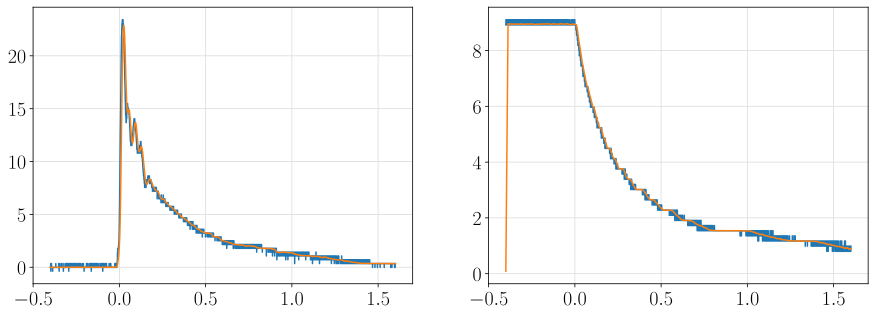

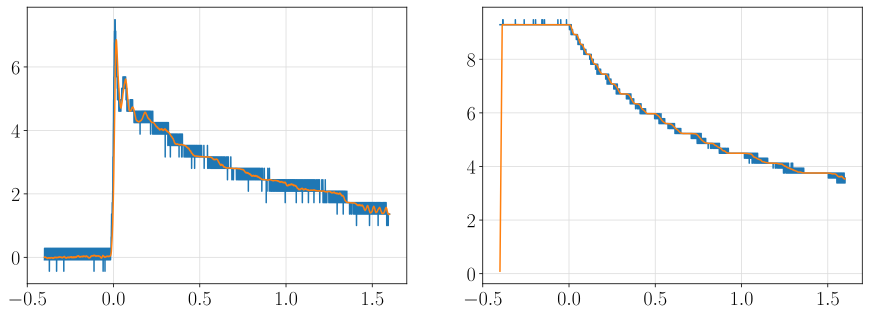

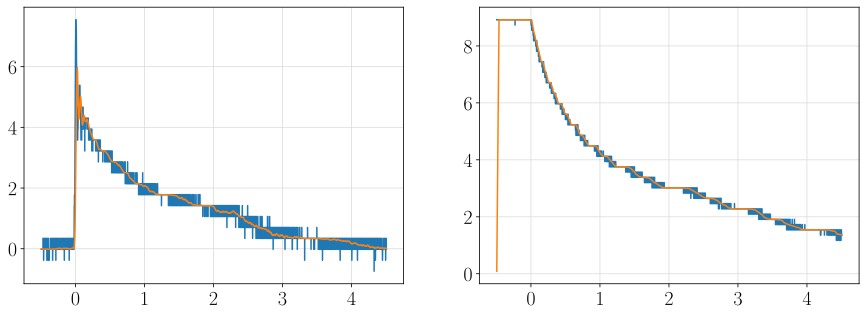

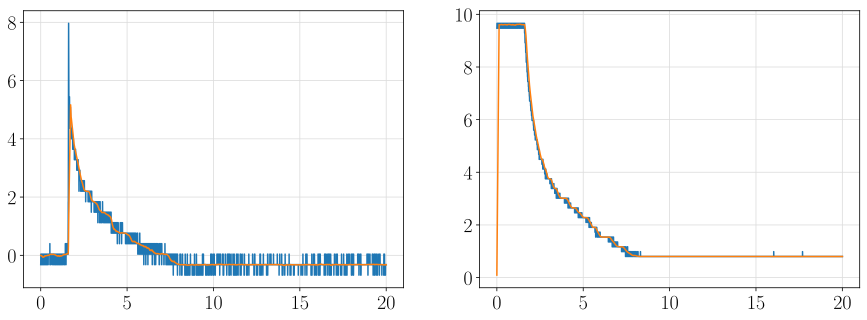

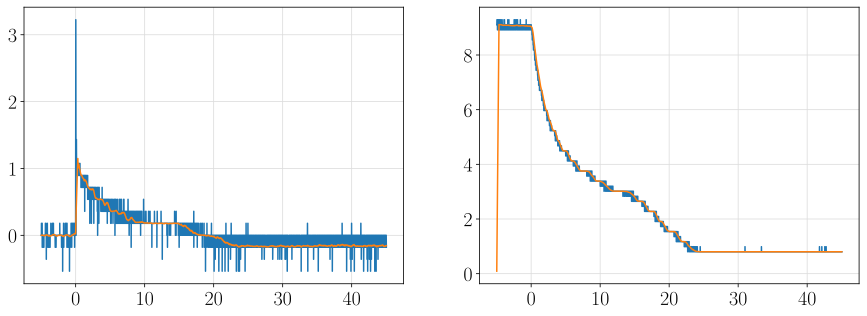

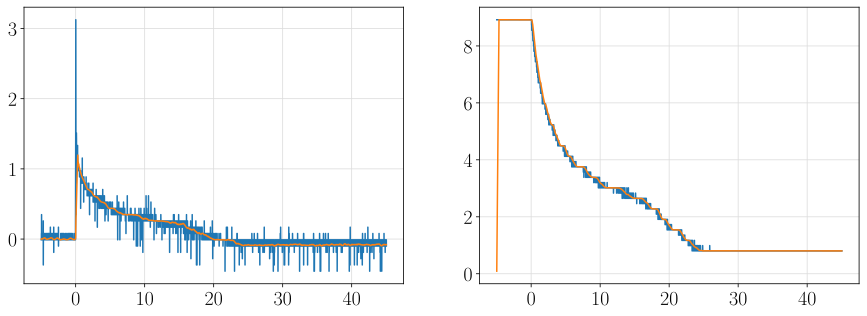

In [743]:
from scipy.signal import lfilter
from scipy.optimize import curve_fit

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [15, 5]
# plt.rc('font', family='Times New Roman')

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax.spines['left'].set_linewidth(ax_width)
ax.spines['bottom'].set_linewidth(ax_width)
ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

time_data = []
F_exp = [] # exp - raw experimental data
p_exp = []

F_filtered_data = []
p_filtered_data = []

for i in range(N):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    time = np.array(data_array_outdoor[i].iloc[:, 0])
    time_data.append(time)
    
    U_F = np.array(data_array_outdoor[i].iloc[:, 1])
    if i == 5:
        U_F = U_F / 1000
    
    U_p = np.array(data_array_outdoor[i].iloc[:, 2])
    p = fit_p_calibr[0] * U_p + fit_p_calibr[1] + 1
    p_exp.append(p)

    ax2.plot(time, p)
    
    n = 100  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    n2 = 100
    b2 = [1.0 / n2] * n2
    a = 1
    U_F_filtered = lfilter(b, a, U_F)
    p_filtered = lfilter(b2, a, p)
    p_filtered_data.append(p_filtered)

    U_F_0 = U_F_filtered[500:1000].mean()
    F = fit_calibr[0] * (U_F - U_F_0)
    F_exp.append(F)

    F_filtered = lfilter(b, a, F)
    F_filtered_data.append(F_filtered)

    ax1.plot(time, F)
    ax1.plot(time, F_filtered)
    ax2.plot(time, p_filtered)
    
    ax1.grid(color='gainsboro')
    ax2.grid(color='gainsboro')


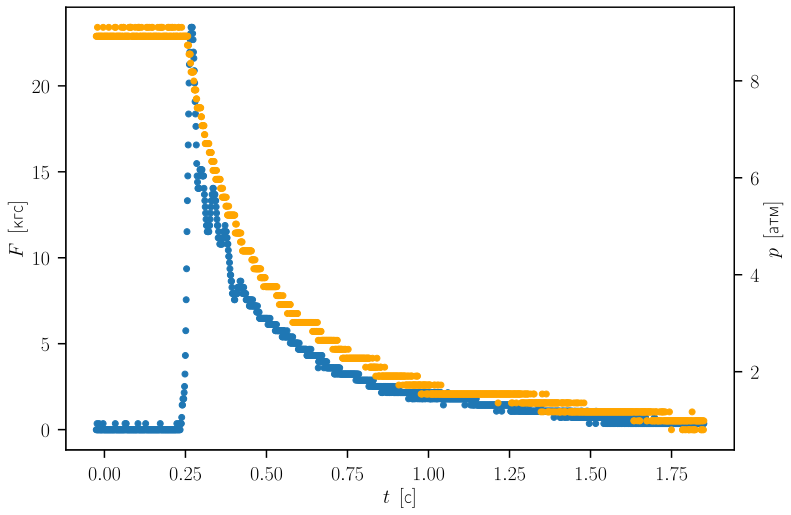

In [791]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [12, 8]
# plt.rc('font', family='Times New Roman')

fig, ax1 = plt.subplots()

# ax1 = plt.gca()
# ax1.spines[['right', 'top']].set_visible(False)
# ax_width = 1.5
# ax1.spines['left'].set_linewidth(ax_width)
# ax1.spines['bottom'].set_linewidth(ax_width)
# ax1.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

# ax2 = plt.gca()
# ax2.spines[['right', 'top']].set_visible(False)
# ax2.spines['left'].set_linewidth(ax_width)
# ax2.spines['bottom'].set_linewidth(ax_width)
# ax2.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

ax1 = plt.gca()
ax1.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax1.spines['left'].set_linewidth(ax_width)
ax1.spines['bottom'].set_linewidth(ax_width)
ax1.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

start_pF = 1000
step_pF = 10
ax1.plot(time_data[0][start_pF::step_pF] + 0.25, F_exp[0][start_pF::step_pF], 'o')

ax1.set_xlabel('$t\\:\\: [\\text{c}]$')
ax1.set_ylabel('$F\\:\\:[\\text{кгс}]$')

ax2 = ax1.twinx()
ax2 = plt.gca()
# ax2.spines[['right', 'top']].set_visible(False)
ax2.spines['right'].set_linewidth(ax_width)
ax2.spines['top'].set_linewidth(ax_width)
ax2.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)
ax2.plot(time_data[0][start_pF::step_pF] + 0.25, p_exp[0][start_pF::step_pF], 'o', color='orange')
# ax2.set_yscale(PowerScale(axis='y', exponent=0.5))
# ax2.set_ylim(1, 9)\
# ax2.set_yticks(np.arange(1, 9, 1)-1)
# ax2.set_ytic(np.arange(1, 9, 1))
# ax2.set_yticklabels(np.arange(1, 9, 1))
# ax2.set_y
# ax2.spines['right'].set_position(('axes', 1.2))
# ax2.set_xlabel('$t\\:\\: [\\text{c}]$')
ax2.set_ylabel('$p\\:\\:[\\text{атм}]$')

plt.savefig('F_p_vs_t.svg', bbox_inches='tight')

[array([1.97015578, 0.7533894 ]), array([0.66579694, 0.0120945 ]), array([0.6313468 , 0.02294003]), array([0.60154892, 0.180916  ]), array([ 0.17722987, -0.20752241]), array([ 0.14540079, -0.03139779])]


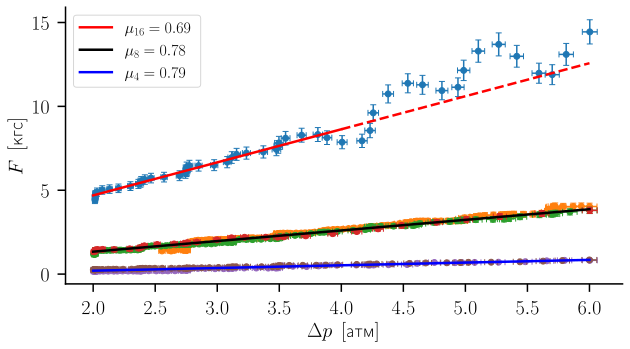

In [703]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]
# plt.rc('font', family='Times New Roman')

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax.spines['left'].set_linewidth(ax_width)
ax.spines['bottom'].set_linewidth(ax_width)
ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

fit_pF = []
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i in range(N):
    p_start = 7 - 1
    p_end = 3 - 1

    p = p_filtered_data[i][500:] - 1
    F = F_filtered_data[i][500:]
    start = np.abs(p - p_start).argmin()
    end = np.abs(p - p_end).argmin()
    step_1 = 50
    # plt.plot(p[start:end:step_1], F[start:end:step_1], 'o') # , linewidth=1, linestyle='--'
    plt.errorbar(p[start:end:step_1], F[start:end:step_1], xerr=p[start:end:step_1]*0.01 ,yerr=F[start:end:step_1] * 0.05, fmt='o', capsize=3, zorder=i, color=colors[i % len(colors)])
    # plt.plot(p[start:end][800:], F[start:end][800:], linewidth=1, linestyle='--')
    if i == 0:
        fit_pF.append(np.polyfit(p[start:end][800:], F[start:end][800:], 1))
    elif i == 1:
        fit_pF.append(np.polyfit(p[start:end][:5500], F[start:end][:5500], 1))
    else:
        fit_pF.append(np.polyfit(p[start:end], F[start:end], 1))

print(fit_pF)

x = np.array([3 - 1, 5 - 1])
k_16 = fit_pF[0][0]
b_16 = fit_pF[0][1]
y_16 = k_16 * x + b_16
plt.plot(x, y_16, linewidth=2.5, label=r"$\mu_{}={}$".format({16}, 0.69), zorder=i + 1, color='red') #round(k_16, 2)
plt.plot(np.array([4, 6]), k_16 * np.array([4, 6]) + b_16, color='red', linestyle='--', linewidth=2.5)

x = np.array([3 - 1, 7 - 1])
k_8 = np.array([fit_pF[1][0], fit_pF[2][0], fit_pF[3][0]]).mean()
b_8 = np.array([fit_pF[1][1], fit_pF[2][1], fit_pF[3][1]]).mean()
k_4 = np.array([fit_pF[4][0], fit_pF[5][0]]).mean()
b_4 = np.array([fit_pF[4][1], fit_pF[5][1]]).mean()
y_8 = k_8 * x + b_8
y_4 = k_4 * x + b_4
plt.plot(x, y_8, linewidth=2.5, label=r"$\mu_{}={}$".format({8}, 0.78), zorder=i + 2, color='black') #round(k_8, 2)
plt.plot(x, y_4, linewidth=2.5, label=r"$\mu_{}={}$".format({4}, 0.79), zorder=i + 3, color='blue') #round(k_4, 2)

plt.xlabel('$\\Delta p\\:\\: [\\text{атм}]$')
plt.ylabel('$F\\:\\:[\\text{кгс}]$')
plt.legend()

# plt.grid(color='gainsboro')

# plt.savefig("F_vs_p.pdf", bbox_inches='tight')
plt.savefig("F_vs_p.svg", bbox_inches='tight')

In [663]:
S_16 = np.pi * (0.016)**2 / 4
S_8 = np.pi * (0.008)**2 / 4
S_4 = np.pi * (0.004)**2 / 4

In [10]:
mu_16 = (k_16 * 9.8 / 1e5 / (2 * S_16))**0.5
mu_16

0.6929204837532699

In [11]:
mu_8 = (k_8 * 9.8 / 1e5 / (2 * S_8))**0.5
mu_8

0.7854703946956497

In [12]:
mu_4 = (k_4 * 9.8 / 1e5 / (2 * S_4))**0.5
mu_4

0.7931054448974039

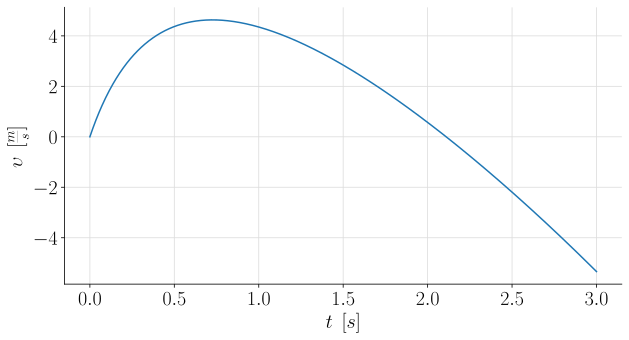

In [821]:
# моделирование уравнения Мещерского
from scipy.integrate import quad

p_a = 1e5
p_0 = 10 * 1e5
m_rocket = 0.1
# V_0 = 0.0002
V_rocket = 0.0022
rho = 1000
tau = 3
g = 9.8

def V(t):
    # коэффициенты из proc2
    a3 = 1.4925734527648119e-05
    a2 = -0.00016820662956579035
    a1 = 0.0008543202811112441
    a0 = 0.000415451133468293
    return a3 * t**3 + a2 * t**2 + a1 * t + a0

V_0 = V(0)

def p(t, alpha):
    return p_0 * (V_0 / V(t))**alpha

def du_dt(t, mu, alpha, S):
    return 2 * mu**2 * S * (p(t, alpha) - p_a) / (m_rocket + rho * (V_rocket - V(t))) - g

mu = mu_8
alpha = 1.4
S = S_8

N_step = 1000
time = np.linspace(0, tau, num=N_step)
u = np.zeros(N_step)
for i in range(N_step):
    u[i], error = quad(du_dt, 0, time[i], args=(mu, alpha, S))

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(time, u)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
plt.grid(color='gainsboro')

5.6119720831664


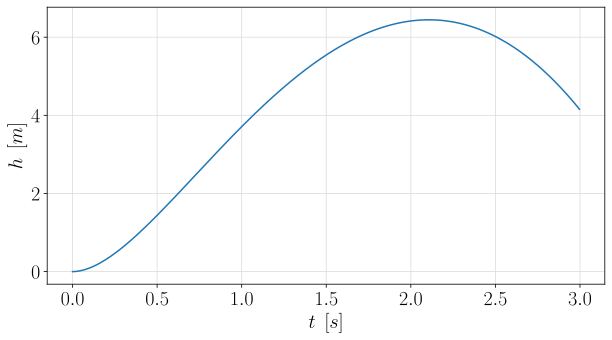

In [822]:
x = np.zeros(N_step - 1)
for i in range(1, N_step - 1):
    x[i] = x[i - 1] + (u[i + 1] + u[i]) / 2 * (time[i + 1] - time[i])

plt.plot(time[:N_step - 1], x)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$h\:\:[m]$')
plt.grid(color='gainsboro')

print(x[-1] + u[-1]**2 / (2 * g))

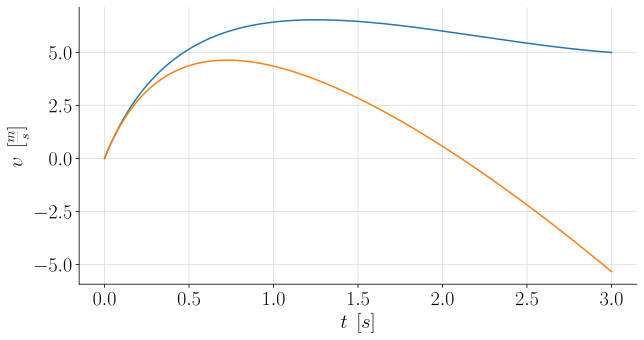

In [823]:
# моделирование уравнения Мещерского с силой сопротивления
from scipy.integrate import solve_ivp

p_a = 1e5
p_0 = 10 * 1e5
m_rocket = 0.1
# V_0 = 0.0002
V_rocket = 0.0022
rho = 1000
tau = 3
g = 9.8
k = 1 / 2 * 1.25 * np.pi * (0.085 / 2)**2 * 0.3

def V(t):
    # коэффициенты из proc2
    a3 = 1.4925734527648119e-05
    a2 = -0.00016820662956579035
    a1 = 0.0008543202811112441
    a0 = 0.000415451133468293
    return a3 * t**3 + a2 * t**2 + a1 * t + a0

V_0 = V(0)

def p(t, alpha):
    return p_0 * (V_0 / V(t))**alpha

def du_dt(t, u, mu, alpha, S):
    return (2 * mu**2 * S * (p(t, alpha) - p_a) - k * u**2) / (m_rocket + rho * (V_rocket - V(t))) - g

mu = mu_8
alpha = 1.2
S = S_8

# Начальные условия
t0 = 0
u0 = 0
N_step = 500

t_span = (t0, 3)
t_eval = np.linspace(t0, 3, N_step)

solution = solve_ivp(du_dt, t_span, [u0], args=(mu, alpha, S), t_eval=t_eval)

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(solution.t, solution.y[0])
plt.plot(time, u)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
plt.grid(color='gainsboro')

In [824]:
def make_data_8_4(file_path):
    return pd.read_csv(
        file_path,
        sep=',',                # Ensure correct delimiter
        decimal='.',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=1              # Skip non-data header rows
    )

data_8_4 = make_data_8_4('pV_8-4_1.csv')
time_exp_8_4 = np.array(data_8_4.iloc[:, 0])
U_p_exp_8_4 = np.array(data_8_4.iloc[:, 2])
p_exp_8_4 = fit_p_calibr[0] * (U_p_exp_8_4 - 1.76)
p_exp_8_4[1000:2000].mean()

6.487975669698504

In [825]:
mu_8

0.7854703946956497

/tmp/ipykernel_76365/4289365489.py:53: RuntimeWarning: invalid value encountered in sqrt
  return -alpha * p / (V_0 * (p_0 / p)**(1 / alpha)) * mu * S * (2 * (p - p_a) / rho)**0.5
/tmp/ipykernel_76365/4289365489.py:53: RuntimeWarning: invalid value encountered in power
  return -alpha * p / (V_0 * (p_0 / p)**(1 / alpha)) * mu * S * (2 * (p - p_a) / rho)**0.5


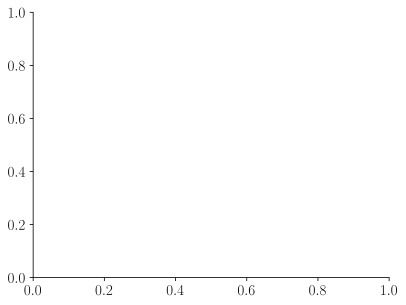

In [2]:
# моделирование уравнения Мещерского
from scipy.integrate import quad
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

p_a = 1e5
p_0 = 11 * 1e5 #(p_exp_8_4[1000:2000].mean() + 1) * 1e5
m_rocket = 0.2
# V_0 = 0.0002
V_rocket = 0.0012 #0.0022
rho = 1000

g = 9.8
alpha = 1.1
N_step = 7000

# mu = 0.8
# Cd = 0.6
# mu = 0.8 # norm? sbivka t1
# Cd = 0.38

# sbivka t1 
tau = 6
# S = S_16
mu = 0.735
Cd = 0.09
angle = np.deg2rad(0)
V_start = np.array([0.000435])
flag_t = 1

# mu = 0.85 # sbivka t2
# Cd = 0.7
# angle = np.deg2rad(4)

# sbivka t2
# S = S_8
# tau = 5
# mu = 0.745
# Cd = 0.08
# angle = np.deg2rad(2)
# V_start = np.array([0.000419])
# flag_t = 2

# V_0 = V_rocket / 2 #0.000415451133468293
d_array = np.linspace(0.003, 0.018, 40)
V_start_0 = np.linspace(0.0002, 0.0009, 40)
S_array_0 = np.pi * np.power(d_array, 2) / 4 #np.linspace(np.pi * (0.001)**2 / 4, np.pi * (0.02)**2 / 4, 10)
VV_start, SS_array = np.meshgrid(V_start_0, S_array_0)
VS_array = np.column_stack((VV_start.ravel(), SS_array.ravel()))


def dp_dt(t, p, alpha, mu, S, V_0):
    return -alpha * p / (V_0 * (p_0 / p)**(1 / alpha)) * mu * S * (2 * (p - p_a) / rho)**0.5

# Начальные условия
t0 = 0
p0 = p_0

t_span = (t0, tau)
t_eval = np.linspace(t0, tau, N_step)

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

p_array = []
time_array = []

for V_0, S in VS_array:
    solution = solve_ivp(dp_dt, t_span, [p0], args=(alpha, mu, S, V_0), t_eval=t_eval)
    
    # plt.plot(solution.t, solution.y[0] / 1e5)
    p_array.append(interp1d(solution.t, solution.y[0], kind='linear'))
    time_array.append(solution.t)
    # start_8_4 = 3200
    # # plt.plot(time_exp_8_4[start_8_4:] - time_exp_8_4[start_8_4], p_exp_8_4[start_8_4:] + 1)
    
    # plt.xlabel(r'$t\:\:[s]$')
    # plt.ylabel(r'$p\:\:[atm]$')
    # plt.grid(color='gainsboro')

In [3]:
N_step = 7000

209527.97940175224
219915.95246937583
229961.98272265415
239591.3750537588
248964.2927036873
258091.52406460384
266968.37319561606
275603.79021730635
284009.93974134955
293934.13075880177
310024.10517723876
326193.5351940703
342441.2090667888
358738.52724269987
375127.83380012086
391584.52458901616
408066.97785392357
424641.8617963591
441295.6833738263
457982.2334304778
474709.3937746649
491503.85934917023
508338.7759697943
525226.2207959542
542191.3727435202
559179.094247529
576229.0761130753
593300.6171971273
610467.7841108392
627653.8388287727
644849.1360171303
662127.7348503575
679384.2062339571
696785.9417514285
714117.8179377625
731553.3508913417
748963.3500348366
766543.0451431181
784043.2380408733
801548.5321192342
183190.84566892215
192097.54836185745
200765.31980849104
209193.26214770373
217393.07033627172
230421.43557197787
246166.89409359143
262002.2577133514
277927.7003780401
293940.56037053425
310034.2365507531
326205.2274798938
342426.4888375366
358734.47895249294
375149

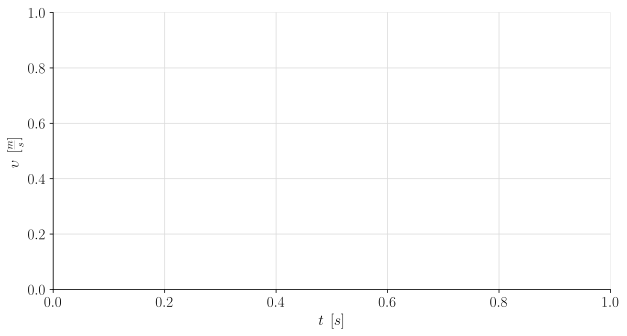

In [4]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

i = 0
u_array = []
time_array_2 = []
stop_solution_array = []
for V_0, S in VS_array:
    p = p_array[i]
    def V(t, alpha, V_0):
        return V_0 * (p_0 / p(t))**(1 / alpha)
    
    # plt.plot(solution.t, V(solution.t, alpha, V_0))
    stop = np.abs(np.array(V(solution.t, alpha, V_0)) - V_rocket).argmin()
    time = np.array(time_array[i])
    i += 1
    print(p(time[stop]))
    
    k = 1 / 2 * 1.25 * np.pi * (0.080 / 2)**2 * Cd
    
    def du_dt(t, u, mu, alpha, S, V_0):
        # if 
        u_mag = np.linalg.norm(u)
        # if t < 0.001:
        #     u_dir = np.array([0, 1])  
        # else:
        u_dir = u / u_mag
        # F_grav = np.array([0, -g])
        F_drag = -k * u_mag**2  * u_dir
        if t < time[stop]:
            m =  (m_rocket + rho * (V_rocket - V(t, alpha, V_0)))
            F_thrust = (2 * mu**2 * S * (p(t) - p_a)) * u_dir
            return (F_thrust + F_drag) / m  + np.array([0, -g])
        elif t >= time[stop]:
            m = m_rocket
            return (F_drag) / m + np.array([0, -g])
     
    # Начальные условия
    t0 = 0

    # u0 = np.array([0, 0]) 
    u0 = np.array([np.sin(angle), np.cos(angle)])*0.0002
    
    t_span = (t0, tau)
    t_eval = np.linspace(t0, tau, N_step)
    
    solution = solve_ivp(du_dt, t_span, u0, args=(mu, alpha, S, V_0), t_eval=t_eval, rtol=1e-11, atol=1e-11)

    u_array.append(solution.y)
    time_array_2.append(solution.t)
    stop_solution = np.abs(solution.y[0][100:]).argmin()
    stop_solution_array.append(stop_solution)
    # plt.plot(np.array(solution.t)[:stop_solution], solution.y[0][:stop_solution]) # [:stop_solution]
    # print(solution.t[stop_solution])
    # plt.plot(np.array(solution.t)[:stop], V(solution.t, alpha, V_0)[:stop] * 1000)
    
    T_8 = np.load('T.npy')
    Vs_8 = np.load('Vs.npy')
    # plt.plot(T_8, Vs_8 / 1e3)
    
plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
# plt.ylabel(r'$V\:\:[l]$')
# plt.legend(V_start * 1e6)
plt.grid(color='gainsboro')

In [1003]:
def make_data_combined(file_path):
    return pd.read_csv(
        file_path,
        sep=',',                # Ensure correct delimiter
        decimal='.',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        # skiprows=0             # Skip non-data header rows
    )
# data_comb_1 = make_data_combined('../experiments/rocket/nov_28/t1/out/combined.csv')
if flag_t == 1:
    data_comb_1 = make_data_combined('../experiments/rocket/nov_28/t1/out/combined.csv')
elif flag_t == 2:
    data_comb_1 = make_data_combined('../experiments/rocket/nov_28/t2/out/combined.csv')
# data_comb_2 = make_data_combined('../experiments/rocket/nov_28/t2/out/combined.csv')
# data_comb_1.head()
time_1 = data_comb_1["t"].to_numpy()
track_z_1 = data_comb_1["track_z"].to_numpy()

# time_2 = data_comb_2["t"].to_numpy()
# track_z_2 = data_comb_2["track_z"].to_numpy()
# plt.plot(time_1, track_z_1)

In [5]:
from scipy.ndimage import gaussian_filter

# plt.rc('text', usetex=True)
# plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# # plt.rc('text.latex',preamble=r'')
# # plt.rc('text.latex',preamble=r'')
# plt.rc('font', size=18)
# # plt.rcParams['text.latex.preamble'] = r'\boldmath'/
# plt.rcParams['axes.titlesize'] = 20
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['xtick.labelsize'] = 20
# plt.rcParams['ytick.labelsize'] = 20
# plt.rcParams['legend.fontsize'] = 16
# plt.rcParams['figure.dpi'] = 300
# plt.gca().spines[['right', 'top']].set_visible(False)
# plt.rcParams['figure.figsize'] = [10, 5]
# # plt.rc('font', family='Times New Roman')

# ax = plt.gca()
# ax.spines[['right', 'top']].set_visible(False)
# ax_width = 1.5
# ax.spines['left'].set_linewidth(ax_width)
# ax.spines['bottom'].set_linewidth(ax_width)
# ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)


h_max = np.zeros(len(V_start_0) * len(S_array_0))
flag_plot = 1
for j in range(len(V_start_0) * len(S_array_0)):
    time = time_array_2[j]
    # x = np.zeros(len(time) - 1)
    u = u_array[j]
    u0_interp = interp1d(time, u[0], kind='linear')
    u1_interp = interp1d(time, u[1], kind='linear')
    def dx_dt(t, x):
        return np.array([u0_interp(t), u1_interp(t)])
    # for i in range(1, len(u) - 1):
    #     x[i] = x[i - 1] + (u[i + 1] + u[i]) / 2 * (time[i + 1] - time[i])

    # Начальные условия
    t0 = 0
    # x0 = 0
    
    # t_span = (t0, tau)
    # t_eval = np.linspace(t0, tau, N_step)
    t_span = (time.min(), time.max())
    t_eval = np.linspace(time.min(), time.max(), N_step)
    
    solution_x = solve_ivp(dx_dt, t_span, [0, 0], t_eval=t_eval, rtol=1e-9, atol=1e-12)

    h_max[j] = np.max(solution_x.y[1])
    # print(h_max[j])
    # if flag_plot == 0:
    #     stop_solution = stop_solution_array[j]
    #     plt.plot(solution_x.t[:], solution_x.y[1][:])

# if flag_plot == 1:
#     # plt.plot(V_start_0 * 1e3, np.sqrt(4 * S_array_0 / np.pi), h_max, c=h_max, cmap='plasma')
#     V_values = VS_array[:, 0]
#     S_values = VS_array[:, 1]
#     plt.scatter(V_values * 1e3, np.sqrt(4 * S_values / np.pi), h_max)
#     plt.xlabel(r'$V_0\:\:[l]$')
#     plt.ylabel(r'$d\:\:[mm]$')
#     plt.zlabel(r'$h_{max}\:\:[m]$')

# if flag_plot == 0:
#     plt.xlabel('$t\\:\\:[\\text{с}]$')
#     plt.ylabel('$h\\:\\:[\\text{м}]$')
# # plt.grid(color='gainsboro')
# # plt.plot(time_1+0.01, track_z_1, c="black")
# # plt.plot(time_1+0.01, data_comb_1["h"], c="black")
# plt.plot(time_1, track_z_1, c="red")


# # data_comb_1_filtered = gaussian_filter(data_comb_1["h"], sigma=10)
# # max_idx = np.abs(data_comb_1_filtered - data_comb_1_filtered.max()).argmin()
# # plt.plot(time_1[:max_idx - 100], data_comb_1["h"][:max_idx - 100], c="black", linestyle='--')
# # plt.plot(time_1[max_idx - 100:max_idx + 100], data_comb_1["h"][max_idx - 100:max_idx + 100], c="black")
# # plt.plot(time_1[max_idx + 100:], data_comb_1["h"][max_idx + 100:], c="black", linestyle='--')

# # # plt.plot(data_comb_1["t"], data_comb_1["camera_1_simple_z"]-data_comb_1["camera_1_simple_z"][0], c="red", linestyle="--")

# # plt.plot(time_1[max_idx - 100:max_idx + 100], data_comb_1_filtered[max_idx - 100:max_idx + 100])
# # plt.plot(time_1[max_idx], data_comb_1_filtered[max_idx], 'o')
# # # plt.xlim(-0.1, 7)
# # # plt.xlim(-0.1, 0.4)
# # plt.ylim(0, 55)
# # # plt.ylim(0, 10)
# # # plt.plot(time_1, data_comb_1["camera_0_simple_z"] - data_comb_1["camera_0_simple_z"][0], c="black")
# # plt.plot(time_1, data_comb_1["camera_1_simple_z"] - data_comb_1["camera_1_simple_z"][0], c="black")

# # # plt.savefig("h_vs_V0_16mm.pdf", bbox_inches='tight')

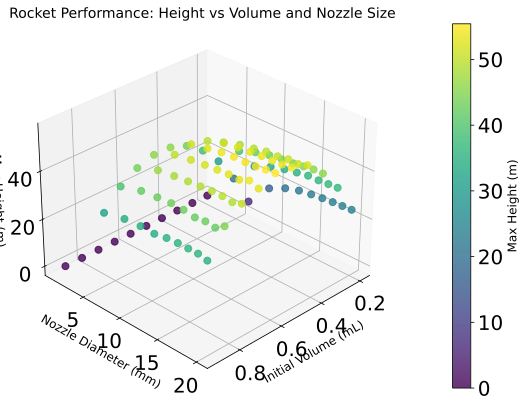

In [29]:
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111, projection='3d')

# V_values = VS_array[:, 0]
# S_values = VS_array[:, 1]

# ax.scatter(V_values * 1e3, np.sqrt(4 * S_values / np.pi), h_max, c='r', marker='o', s=50)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Disable LaTeX to avoid rendering issues
plt.rcParams['text.usetex'] = False

# Create figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Assuming you have these variables defined:
# VS_array - contains your V and S values
# h_max - contains your height values

# Extract values
V_values = VS_array[:, 0] * 1e3  # Convert to mL
S_values = VS_array[:, 1]
diameters = np.sqrt(4 * S_values / np.pi) * 1e3  # Convert to mm

# Create scatter plot
sc = ax.scatter(
    V_values,
    diameters,
    h_max,
    c=h_max,            # Color by height
    cmap='viridis',     # Color map
    marker='o',
    s=50,
    alpha=0.8
)

# Add colorbar
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Max Height (m)', fontsize=12)

# Labels
ax.set_xlabel('Initial Volume (mL)', fontsize=12)
ax.set_ylabel('Nozzle Diameter (mm)', fontsize=12)
ax.set_zlabel('Max Height (m)', fontsize=12)
ax.set_title('Rocket Performance: Height vs Volume and Nozzle Size', fontsize=14)

# Adjust view
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

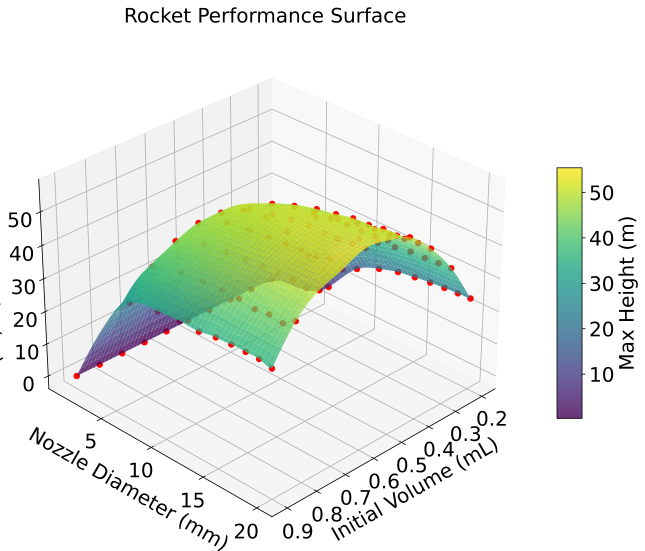

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Disable LaTeX to avoid potential issues
plt.rcParams['text.usetex'] = False
plt.rcParams['figure.figsize'] = [12, 8]

# Assuming you have these variables:
# VS_array - contains V and S values (N x 2 array)
# h_max - corresponding height values (N array)

# Extract and convert units
V_values = VS_array[:, 0] * 1e3  # Convert to mL
S_values = VS_array[:, 1]
diameters = np.sqrt(4 * S_values / np.pi) * 1e3  # Convert to mm

# Create grid for surface interpolation
v_grid = np.linspace(V_values.min(), V_values.max(), 100)
d_grid = np.linspace(diameters.min(), diameters.max(), 100)
V_mesh, D_mesh = np.meshgrid(v_grid, d_grid)

# Interpolate h_max values onto the grid
h_surface = griddata(
    (V_values, diameters),  # Input points
    h_max,                  # Values at input points
    (V_mesh, D_mesh),       # Grid to interpolate to
    method='cubic'          # Cubic interpolation for smooth surface
)

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(
    V_mesh, D_mesh, h_surface,
    cmap='viridis',
    alpha=0.8,
    linewidth=0,
    antialiased=True
)

# Add the original scatter points
ax.scatter(
    V_values, diameters, h_max,
    c='red', marker='o', s=30,
    alpha=1, label='Original Data'
)

# Add colorbar
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.set_label('Max Height (m)')

# Labels and title
ax.set_xlabel('Initial Volume (mL)', labelpad=10)
ax.set_ylabel('Nozzle Diameter (mm)', labelpad=10)
ax.set_zlabel('Max Height (m)', labelpad=10)
ax.set_title('Rocket Performance Surface', pad=20)

# Adjust view
ax.view_init(elev=30, azim=45)
plt.tight_layout()
plt.show()

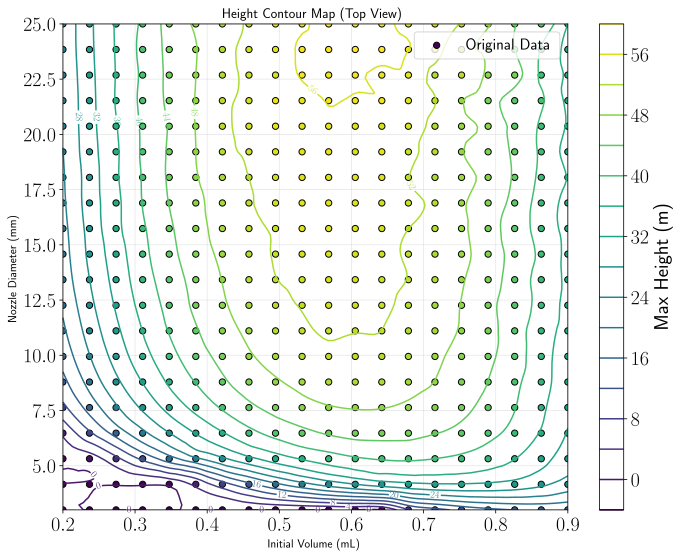

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# 1. Prepare your data (using your existing variables)
V_values = VS_array[:, 0] * 1e3  # Convert to mL
S_values = VS_array[:, 1]
diameters = np.sqrt(4 * S_values / np.pi) * 1e3  # Convert to mm

# 2. Create interpolation grid
v_grid = np.linspace(V_values.min(), V_values.max(), 100)
d_grid = np.linspace(diameters.min(), diameters.max(), 100)
V_mesh, D_mesh = np.meshgrid(v_grid, d_grid)

# 3. Interpolate heights
h_surface = griddata(
    (V_values, diameters),
    h_max,
    (V_mesh, D_mesh),
    method='cubic'
)

# 4. Create the plot
plt.figure(figsize=(10, 8))

# Top-down view with contours
CS = plt.contour(
    V_mesh, D_mesh, h_surface,
    levels=15,  # Number of contour lines
    cmap='viridis',
    linewidths=1.5
)
plt.clabel(CS, inline=True, fontsize=10)  # Label the contours

# Add colorbar
plt.colorbar(CS, label='Max Height (m)')

# Add the original data points
plt.scatter(
    V_values, diameters,
    c=h_max, cmap='viridis',
    s=40, edgecolors='black',
    label='Original Data'
)

# Labels and title
plt.xlabel('Initial Volume (mL)', fontsize=12)
plt.ylabel('Nozzle Diameter (mm)', fontsize=12)
plt.title('Height Contour Map (Top View)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

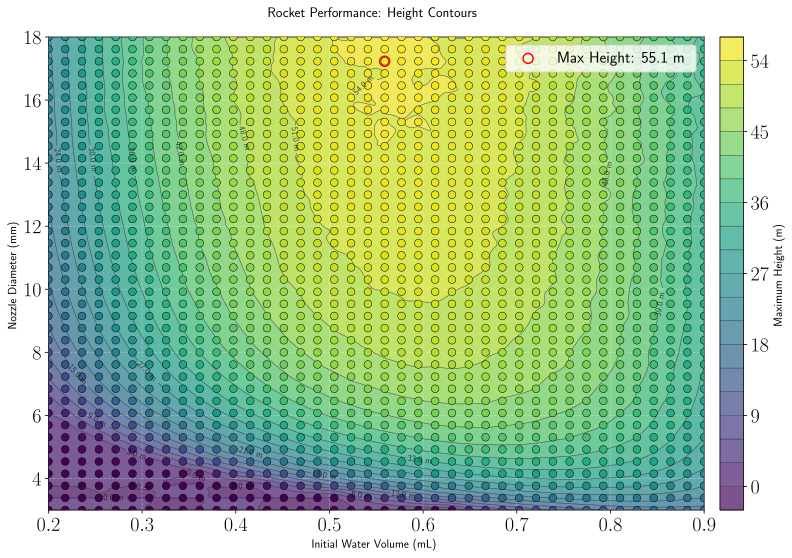

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Prepare data
V_values = VS_array[:, 0] * 1e3  # Convert to mL
diameters = np.sqrt(4 * VS_array[:, 1] / np.pi) * 1e3  # Convert to mm

# Create interpolation grid
grid_points = 200  # Higher resolution for smoother contours
v_grid = np.linspace(V_values.min(), V_values.max(), grid_points)
d_grid = np.linspace(diameters.min(), diameters.max(), grid_points)
V_mesh, D_mesh = np.meshgrid(v_grid, d_grid)

# Interpolate with cubic for smooth results
h_surface = griddata((V_values, diameters), h_max, (V_mesh, D_mesh), method='cubic')

# Create figure
plt.figure(figsize=(12, 8))

# 1. Filled contours (infill)
cf = plt.contourf(
    V_mesh, D_mesh, h_surface,
    levels=20,
    cmap='viridis',
    alpha=0.7  # Semi-transparent
)

# 2. Contour lines
contours = plt.contour(
    V_mesh, D_mesh, h_surface,
    levels=20,
    colors='black',
    linewidths=0.5,
    alpha=0.7
)

# 3. Contour labels (every 3rd line for clarity)
plt.clabel(contours, 
           inline=True, 
           fontsize=9,
           fmt='%1.1f m',  # Format with 1 decimal + unit
           colors='black')

# 4. Original data points
sc = plt.scatter(
    V_values, diameters,
    c=h_max, cmap='viridis',
    s=60, edgecolors='black',
    linewidth=0.5,
    zorder=3  # Ensure points are on top
)

# Add colorbar
cbar = plt.colorbar(cf, pad=0.02)
cbar.set_label('Maximum Height (m)', fontsize=12)
cbar.add_lines(contours)  # Add lines to colorbar

# Labels and title
plt.xlabel('Initial Water Volume (mL)', fontsize=12)
plt.ylabel('Nozzle Diameter (mm)', fontsize=12)
plt.title('Rocket Performance: Height Contours', fontsize=14, pad=20)

# Grid and layout
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().set_facecolor('#f5f5f5')  # Light gray background
plt.tight_layout()

# Add optimization annotations
max_idx = np.argmax(h_max)
plt.scatter(V_values[max_idx], diameters[max_idx], 
            s=100, facecolors='none', 
            edgecolors='red', linewidths=1.5,
            label=f'Max Height: {h_max[max_idx]:.1f} m')
plt.legend(loc='upper right')

plt.show()

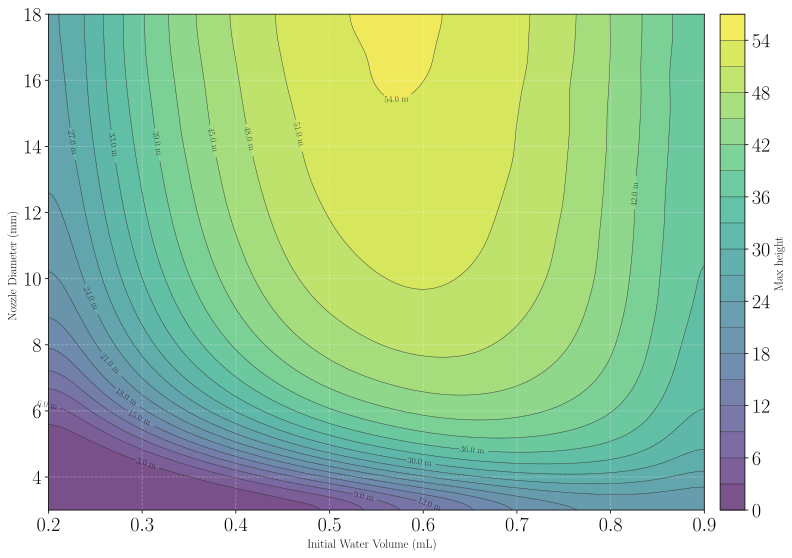

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

plt.rcParams['font.family'] = 'DejaVu Sans'  # Or another font that supports Cyrillic

# Prepare data
V_values = VS_array[:, 0] * 1e3  # Convert to mL
diameters = np.sqrt(4 * VS_array[:, 1] / np.pi) * 1e3  # Convert to mm

# Create interpolation grid
grid_points = 200  # Higher resolution for smoother contours
v_grid = np.linspace(V_values.min(), V_values.max(), grid_points)
d_grid = np.linspace(diameters.min(), diameters.max(), grid_points)
V_mesh, D_mesh = np.meshgrid(v_grid, d_grid)

# First interpolate to a regular grid
h_surface = griddata((V_values, diameters), h_max, (V_mesh, D_mesh), method='cubic')

# Apply Gaussian filter to the interpolated data
sigma = 7  # Adjust this value to control smoothing (higher = more smoothing)
h_surface_filtered = gaussian_filter(h_surface, sigma=sigma)

# Create figure
plt.figure(figsize=(12, 8))

# 1. Filled contours (infill) with filtered data
cf = plt.contourf(
    V_mesh, D_mesh, h_surface_filtered,
    levels=20,
    cmap='viridis',
    alpha=0.7  # Semi-transparent
)

# 2. Contour lines with filtered data
contours = plt.contour(
    V_mesh, D_mesh, h_surface_filtered,
    levels=20,
    colors='black',
    linewidths=0.5,
    alpha=0.7
)

# 3. Contour labels (every 3rd line for clarity)
plt.clabel(contours, 
           inline=True, 
           fontsize=9,
           fmt='%1.1f m',  # Format with 1 decimal + unit
           colors='black')

# Add colorbar
cbar = plt.colorbar(cf, pad=0.02)
cbar.set_label('Max height', fontsize=12)
cbar.add_lines(contours)  # Add lines to colorbar

# Labels and title
plt.xlabel('Initial Water Volume (mL)', fontsize=12)
plt.ylabel('Nozzle Diameter (mm)', fontsize=12)
# plt.title('Rocket Performance: Height Contours (Smoothed)', fontsize=14, pad=20)

# Grid and layout
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().set_facecolor('#f5f5f5')  # Light gray background
plt.tight_layout()

plt.savefig("h_max_VS.png", bbox_inches='tight')
plt.show()

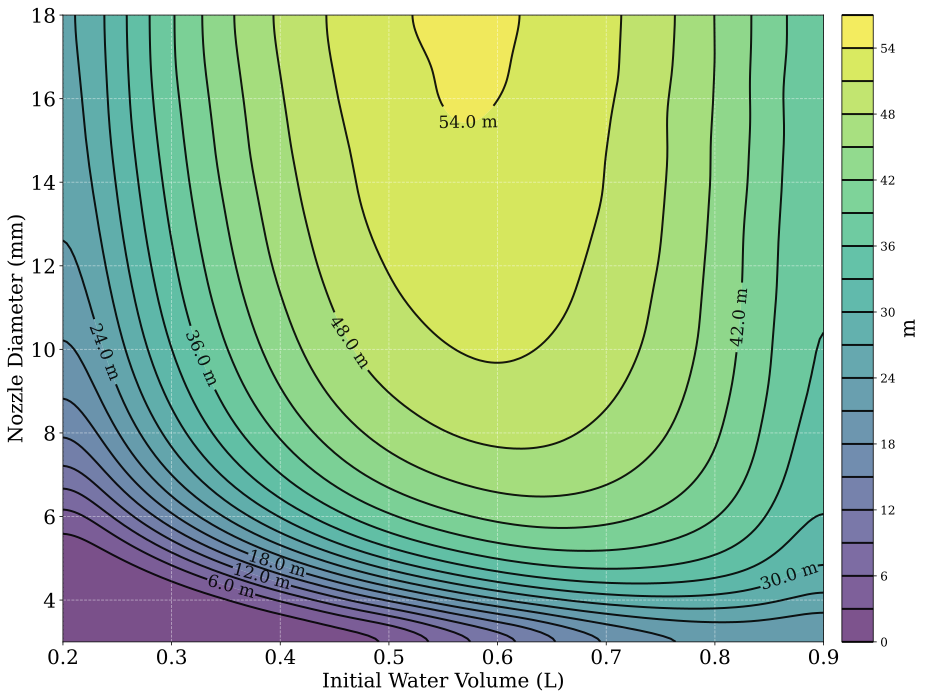

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

plt.rcParams.update({
    "text.usetex": False,  # Disable LaTeX rendering
    "font.size": 16,       # Base font size
    "axes.titlesize": 20,  # Title font size
    "axes.labelsize": 20,  # Axis label font size
    "xtick.labelsize": 20, # X-axis tick label size
    "ytick.labelsize": 20, # Y-axis tick label size
})
plt.rcParams['figure.dpi'] = 300

# Prepare data
V_values = VS_array[:, 0] * 1e3  # Convert to mL
diameters = np.sqrt(4 * VS_array[:, 1] / np.pi) * 1e3  # Convert to mm

# Create interpolation grid
grid_points = 200  # Higher resolution for smoother contours
v_grid = np.linspace(V_values.min(), V_values.max(), grid_points)
d_grid = np.linspace(diameters.min(), diameters.max(), grid_points)
V_mesh, D_mesh = np.meshgrid(v_grid, d_grid)

# First interpolate to a regular grid
h_surface = griddata((V_values, diameters), h_max, (V_mesh, D_mesh), method='cubic')

# Apply Gaussian filter to the interpolated data
sigma = 7  # Strong smoothing as specified
h_surface_filtered = gaussian_filter(h_surface, sigma=sigma)

# Create figure with larger figure size for better visibility
plt.figure(figsize=(14, 10))

# 1. Filled contours (infill) with filtered data
cf = plt.contourf(
    V_mesh, D_mesh, h_surface_filtered,
    levels=20,
    cmap='viridis',
    alpha=0.7  # Semi-transparent
)

# 2. Contour lines with filtered data - made thicker (2.0 instead of 0.5)
contours = plt.contour(
    V_mesh, D_mesh, h_surface_filtered,
    levels=20,
    colors='black',
    linewidths=2.0,  # Increased from 0.5 to 2.0
    alpha=0.9  # Slightly less transparent
)

# 3. Contour labels - made larger (14 instead of 9)
levels_to_label = [5, 10, 15, 20]  # Only label these specific levels
plt.clabel(contours,
           contours.levels[::2],
           inline=True, 
           fontsize=17,  # Increased from 9 to 14
           fmt='%1.1f m',
           colors='black')

# Add colorbar with larger font
cbar = plt.colorbar(cf, pad=0.02)
cbar.set_label('m', fontsize=20)  # More descriptive and larger
cbar.add_lines(contours)
cbar.ax.tick_params(labelsize=12)  # Larger tick labels

# Labels and title with larger fonts
plt.xlabel('Initial Water Volume (L)', fontsize=20)  # Increased from 12 to 14
plt.ylabel('Nozzle Diameter (mm)', fontsize=20)  # Increased from 12 to 14

# Grid with more visible lines
plt.grid(True, color='white', linestyle='--', alpha=0.5)
plt.gca().set_facecolor('#f5f5f5')

# Adjust layout to accommodate larger elements
plt.tight_layout()

# Save with high DPI for better quality
plt.savefig("h_max_VS.png", bbox_inches='tight', dpi=300)
plt.savefig("h_max_VS.svg", bbox_inches='tight', dpi=300)
# plt.show()

In [25]:
# if flag_plot == 1:
plt.plot((V_start * 1e3)[1:][5:-5],  gaussian_filter(h_max[1:], 5)[5:-5])
plt.scatter(0.435, data_comb_1_filtered[max_idx]*0.98)
# plt.plot((V_start * 1e3)[1:], h_max[1:], 'o')
plt.xlabel(r'$V_0\:\:[l]$')
plt.ylabel(r'$h_{max}\:\:[m]$')
plt.savefig("h_V0.svg")

ValueError: x and y must have same first dimension, but have shapes (0,) and (89,)

Error in callback <function _draw_all_if_interactive at 0x7ff42ff3eca0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../db37806144b59e5b73bd36d3a9dc4c05.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../db37806144b59e5b73bd36d3a9dc4c05.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/generic/babel/babel.sty
(/usr/share/texlive/texmf-dist/tex/generic/babel/txtbabel.def)

! Package babel Error: Unknown option 'russian'. Either you misspelled it
(babel)                or the language definition file russian.ldf
(babel)                was not found.

See the babel package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.4291 \ProcessOptions*
                       
No pages of output.
Transcript written on db37806144b59e5b73bd36d3a9dc4c05.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../db37806144b59e5b73bd36d3a9dc4c05.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../db37806144b59e5b73bd36d3a9dc4c05.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/generic/babel/babel.sty
(/usr/share/texlive/texmf-dist/tex/generic/babel/txtbabel.def)

! Package babel Error: Unknown option 'russian'. Either you misspelled it
(babel)                or the language definition file russian.ldf
(babel)                was not found.

See the babel package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.4291 \ProcessOptions*
                       
No pages of output.
Transcript written on db37806144b59e5b73bd36d3a9dc4c05.log.




<Figure size 3000x1500 with 1 Axes>

In [ ]:
# plt.gca().axis("equal")
# plt.plot(solution_x.y[0], solu
# tion_x.y[1])
# plt.ylim(0, 40)


In [ ]:
Cd

0.09

In [ ]:
mu

0.85

In [ ]:
mu_8

0.7854703946956497

In [ ]:
Cd

0.05

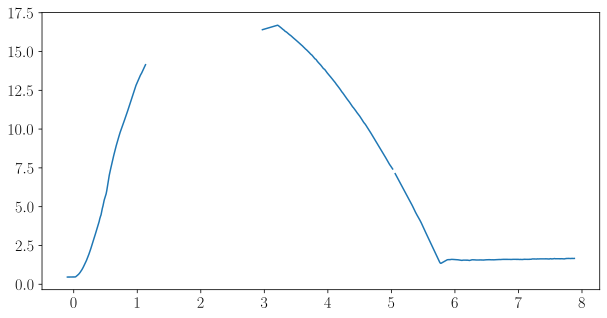

In [ ]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         48 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  16
  On-line CPU(s) list:   0-15
Vendor ID:               AuthenticAMD
  Model name:            AMD Ryzen 7 8845HS w/ Radeon 780M Graphics
    CPU family:          25
    Model:               117
    Thread(s) per core:  2
    Core(s) per socket:  8
    Socket(s):           1
    Stepping:            2
    Frequency boost:     enabled
    CPU max MHz:         6679.6870
    CPU min MHz:         1600.0000
    BogoMIPS:            7585.31
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall n
                         x mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_go
                         od amd_lbr_v2 nopl nonstop_tsc cpuid extd_apicid aperfm
                         perf rapl pni pc

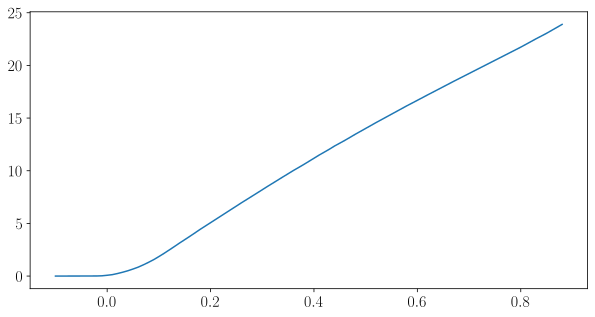

In [ ]:


T_1 = np.load('T.npy')
Vs_1 = np.load('Vs.npy')

plt.plot()